In [2]:
import pyodbc
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
conn = pyodbc.connect ("DSN=BoxOffice;"
                      "Server=DESKTOP-AAGNMGA\SQLEXPRESS;"
                      "Database=BoxOffice;"
                      "Trusted_Connection=yes;")

In [5]:
movies = pd.read_sql("SELECT * FROM movies;",conn)
movies.head()

,movie_id,budget,homepage,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,tagline,revenue
0,1,14000000,None,tt2637294,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2015-02-20,93.0,Released,The Laws of Space and Time are About to be Vio...,12314651.0
1,2,40000000,None,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2004-08-06,113.0,Released,It can take a lifetime to find true love; she'...,95149435.0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,2014-10-10,105.0,Released,The road to greatness can take you to the edge.,13092000.0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,2012-03-09,122.0,Released,None,16000000.0
4,5,0,None,tt1380152,ko,????,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2009-02-05,118.0,Released,None,3923970.0


# Main table analysis

In [6]:
summary = movies.describe()
summary

,movie_id,budget,popularity,runtime,revenue
count,7398.000000,7.398000e+03,7398.000000,7392.000000,3.000000e+03
mean,3699.500000,2.260146e+07,8.514968,107.717262,6.672585e+07
std,2135.762978,3.694867e+07,12.165794,21.480040,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,1850.250000,0.000000e+00,3.933124,94.000000,2.379808e+06
50%,3699.500000,7.500000e+06,7.435844,104.000000,1.680707e+07
75%,5548.750000,2.800000e+07,10.920002,118.000000,6.891920e+07
max,7398.000000,3.800000e+08,547.488298,338.000000,1.519558e+09


In [7]:
### frequencies of original language
lang_freq = movies.groupby('original_language').\
                   agg({'original_language':['count']})
lang_freq.reset_index(inplace=True)
lang_freq.columns = ['original_language','count']

In [8]:
lang_freq.sort_values('count', ascending=False)

,original_language,count
10,en,6351
14,fr,199
16,hi,118
33,ru,109
11,es,95
21,ja,90
20,it,56
24,ko,49
8,de,49
43,zh,46


In [11]:
### differences between the average revenue by language?

    
rev_lang = movies.groupby(['original_language']).\
                  agg({'revenue':['mean','std'],'original_language':['count']})
rev_lang.reset_index(inplace=True)
rev_lang.columns = ['original_language','mean','std','count']
rev_lang.sort_values('count', ascending=False)

,original_language,mean,std,count
10,en,7.466591e+07,1.459160e+08,6351
14,fr,1.713257e+07,5.174665e+07,199
16,hi,2.534637e+07,4.961680e+07,118
33,ru,6.929453e+06,1.190718e+07,109
11,es,8.564790e+06,1.362038e+07,95
21,ja,3.065180e+07,3.241593e+07,90
20,it,1.641513e+07,4.621446e+07,56
24,ko,1.377670e+07,2.134478e+07,49
8,de,2.053090e+07,3.097911e+07,49
43,zh,7.037637e+07,1.045714e+08,46


In [12]:
ggplot(data=movies) +
    geom_density(aes(log(revenue), group=original_language, color=original_language))
    


SyntaxError: invalid syntax (<ipython-input-12-116d9f3d30af>, line 1)

C:\Users\Mayer\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Mayer\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


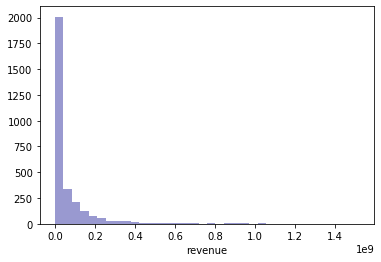

In [19]:
sns.distplot(movies['revenue'], hist=False, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 4})